# CTG

- source: https://archive.ics.uci.edu/ml/datasets/Cardiotocography#
- reference: *Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318*

The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. 

Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

The dataset consists of the following features:

- **LB** - FHR baseline (beats per minute)
- **AC** - # of accelerations per second
- **FM** - # of fetal movements per second
- **UC** - # of uterine contractions per second
- **DL** - # of light decelerations per second
- **DS** - # of severe decelerations per second
- **DP** - # of prolongued decelerations per second
- **ASTV** - percentage of time with abnormal short term variability
- **MSTV** - mean value of short term variability
- **ALTV** - percentage of time with abnormal long term variability
- **MLTV** - mean value of long term variability
- **Width** - width of FHR histogram
- **Min** - minimum of FHR histogram
- **Max** - Maximum of FHR histogram
- **Nmax** - # of histogram peaks
- **Nzeros** - # of histogram zeros
- **Mode** - histogram mode
- **Mean** - histogram mean
- **Median** - histogram median
- **Variance** - histogram variance
- **Tendency** - histogram tendency

- **CLASS** - FHR pattern class code (1 to 10)
- **NSP** - fetal state class code (N=normal; S=suspect; P=pathologic)

### Import packages

Import useful packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC


### Import data

Import data from Excel file CTG.xls

In [2]:
path = "../data/"
filename = "CTG.xls"

fetus = pd.read_excel(path+filename, sheet_name = "Data",header=1)
fetus.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
1,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
2,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1


In [3]:
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]

In [4]:
X = fetus[columns]
y1 = fetus["NSP"]
y2 = fetus["CLASS"]
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0,0,0,0,0,0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1
1,132,4,0,4,2,0,0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,2,0,5,2,0,0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,2,0,6,2,0,0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,4,0,5,0,0,0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1


The dataset consists of 21 features and 2126 entries, all non-null.

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   DL        2126 non-null   int64  
 5   DS        2126 non-null   int64  
 6   DP        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [6]:
X.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,46.990122,1.332785,9.84666,...,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320
std,9.840844,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,17.192814,0.883241,18.39688,...,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,61.000000,1.700000,11.00000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,87.000000,7.000000,91.00000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


### Analyse outputs

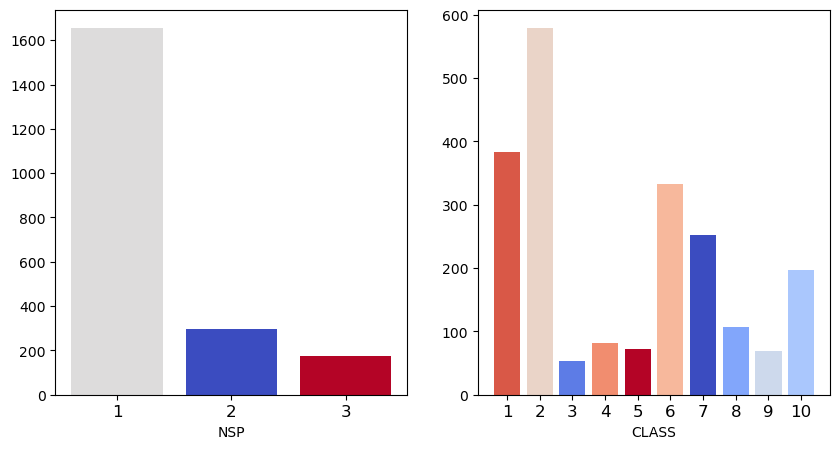

In [7]:
# colormap source: https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig, ax = plt.subplots(1,2,figsize = (10,5))

ax[0].bar(np.arange(1,4),fetus.groupby(by="NSP").size(),color=my_cmap(rescale(fetus["NSP"].unique())))
ax[1].bar(np.arange(1,11),fetus.groupby(by="CLASS").size(),color=my_cmap(rescale(fetus["CLASS"].unique())))

ax[0].set_xticks(np.arange(1,4)) 
ax[0].set_xticklabels(np.arange(1,4), fontsize=12)
ax[0].set_xlabel("NSP")
ax[1].set_xticks(np.arange(1,11)) 
ax[1].set_xticklabels(np.arange(1,11), fontsize=12)
ax[1].set_xlabel("CLASS");

### Scaling of the features

Usually, features values have different orders of magnitude. We can apply a Standard Scaler to distribute the values across the same distribution. In this way, the learning algorithm isn't biased by the absolute magnitude of the features.

In [8]:
# Apply the standar scaler to features
sc = StandardScaler()

sc.fit(X)
Xst = pd.DataFrame(sc.transform(X),columns=columns)
Xst.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,2.465364e-16,1.524024e-15,9.147590e-16,-2.243423e-15,7.254767e-16,-3.601541e-15,2.687304e-16,-2.481552e-16,2.291362e-15,...,8.564279e-17,-6.120326e-17,-4.047144e-17,2.408965e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-7.647398e-01,-1.950961e-01,-1.285798e+00,-6.283755e-01,-5.747560e-02,-2.715300e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-7.647398e-01,-1.950961e-01,-9.344795e-01,-6.283755e-01,-5.747560e-02,-2.715300e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-4.838420e-01,-1.950961e-01,-2.318435e-01,-6.283755e-01,-5.747560e-02,-2.715300e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,3.588517e-01,-1.412118e-01,4.707926e-01,5.722772e-01,-5.747560e-02,-2.715300e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,6.538605e+00,1.500027e+01,6.794517e+00,5.775106e+00,1.739869e+01,8.344482e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


### Finding outliers

Checking the statistical descprition of the scaled dataset, in particular minimimu and maximum values, it is possibile to detect some outliers. An outlier is defined as a point in the dataset whose shift from the mean is 3 times grater than the standard deviation. Employing the Z-score, defined as follows:

$z = \frac{x-\mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ is the standard deviation,

an outlier is a point with an absolute value of Z-score greater than 3.


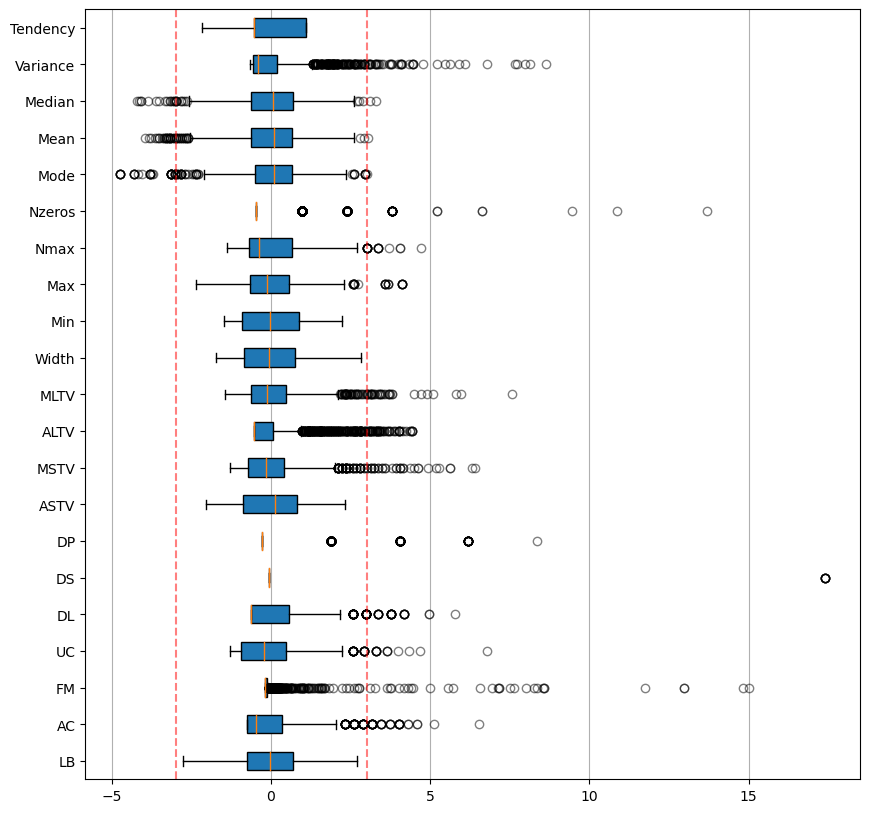

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

bp = plt.boxplot(Xst,labels=columns,vert=0,patch_artist = True)

ax.axvline(3, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(-3, c = "red", linestyle="--", alpha = 0.5)


plt.gca().xaxis.grid(True)

# source for aestetic improvements: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
for dot in bp['fliers']:
    dot.set(marker ='o',
              color ='lightgrey',
              alpha = 0.5)
    
#for patch, color in zip(bp['boxes'], colors):
#    patch.set_facecolor(color)    c=my_cmap(rescale(fetus["NSP"]))

### Treating outliers

TBD

### Splitting data

In [10]:
# Split in train and test dataset (with and without Standard Scaler application)
X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8,random_state=35)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X,y1,train_size=0.8,random_state=35)

### PCA analysis

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(X)

pcast = PCA()
pcast.fit(Xst)

PCA()

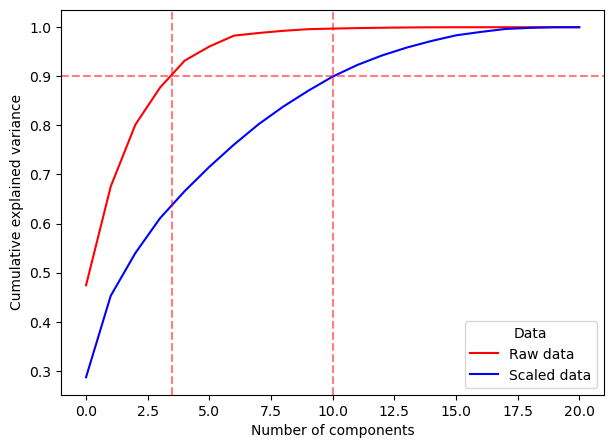

In [13]:
fig, ax = plt.subplots(figsize=(7,5))

plt.plot(np.cumsum(pca.explained_variance_ratio_),c="r",label = "Raw data")
plt.plot(np.cumsum(pcast.explained_variance_ratio_),c="b",label = "Scaled data")
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance');
ax.axhline(0.9, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(10, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(3.5, c = "red", linestyle="--", alpha = 0.5)
plt.legend(title="Data")

Applying PCA to both raw and scaled data, the cumulative explained variance displays different trends. A 90% variance is obtained with 3 components for the raw data and for 10 components for the scaled data. 

Text(0.5, 0, 'Component 3')

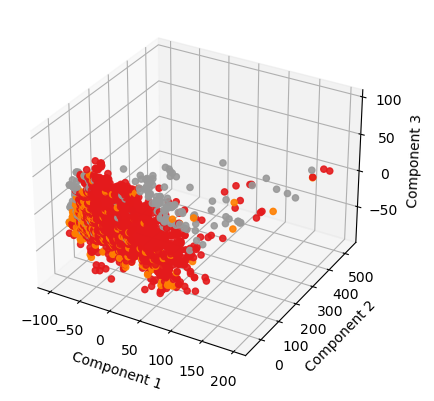

In [14]:
pca = PCA(3) 
X_projected = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1],X_projected[:, 2], c=y1,alpha=0.9, cmap=plt.cm.get_cmap('Set1', 7))

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

## Baseline model: KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

KNN.fit(X_train_st, y_train_st)
y_pred_st = KNN.predict(X_test_st)

print("BASELINE - KNN accuracy: %.2f" % accuracy_score(y_pred,y_test) )
print("BASELINE - KNN recall: %.2f" % recall_score(y_pred,y_test,average="macro") )
print("BASELINE - KNN accuracy with Standard Scalar: %.2f" % accuracy_score(y_pred_st,y_test_st) )
print("BASELINE - KNN recall with Standard Scalar: %.2f" % recall_score(y_pred_st,y_test_st,average="macro") )

BASELINE - KNN accuracy: 0.91
BASELINE - KNN recall: 0.83
BASELINE - KNN accuracy with Standard Scalar: 0.91
BASELINE - KNN recall with Standard Scalar: 0.83


## First approach: subsampling the classes

As seen above, the dataset shows a strong imbalance between classes. In particular, the least populous class has 176 items.
One strategy for assessing the sensitivity to this dataset is to randomly subsample the other classes, such that they all have the same number of elements.

In [16]:
f = fetus[["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency", "NSP"]]

f1 = f[f["NSP"] == 1]
f2 = f[f["NSP"] == 2]
f3 = f[f["NSP"] == 3]

print("Elements in class 1: %.0f"%f1["NSP"].count())
print("Elements in class 2: %.0f"%f2["NSP"].count())
print("Elements in class 3: %.0f"%f3["NSP"].count())

Elements in class 1: 1655
Elements in class 2: 295
Elements in class 3: 176


The objective is therefore to resize classes 1 and 3 to obtain the same number of elements as class 3. This greatly reduces the size of the dataset (introducing possible underfitting problems), but could help to prevent problems of unbalancing the models towards the larger class.

In [17]:
n = 176 # number of elements for subsampled sets

# Subsample the two larger classes
f1_sub = f1.sample(n=n,random_state=34, axis=0)
f2_sub = f2.sample(n=n,random_state=34, axis=0)

# concat the subsamples datasets
f_sub = pd.concat([f1_sub,f2_sub,f3],axis=0,join="outer")
# shuffles the elements
f_sub = f_sub.sample(frac=1).reset_index(drop=True)

# Define features and target sets
y1_sub = f_sub["NSP"]
X_sub = f_sub.drop(labels="NSP",axis=1)

## Decision Tree

In [46]:
def apply_dt(X_train, X_test, y_train, y_test, dt = None, random_state=35):

    if dt is None:
        
        dt = DecisionTreeClassifier(random_state=random_state)

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    print("Decision Tree accuracy: %.2f" %accuracy_score(y_pred, y_test))
    print("Decision Tree recall: %.2f" %recall_score(y_pred, y_test,average='macro'))

    cm = confusion_matrix(y_pred, y_test,normalize="all")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_);
    disp.plot()
    
    return dt

Apply Decision Tree to raw data:

Decision Tree accuracy: 0.92
Decision Tree recall: 0.85


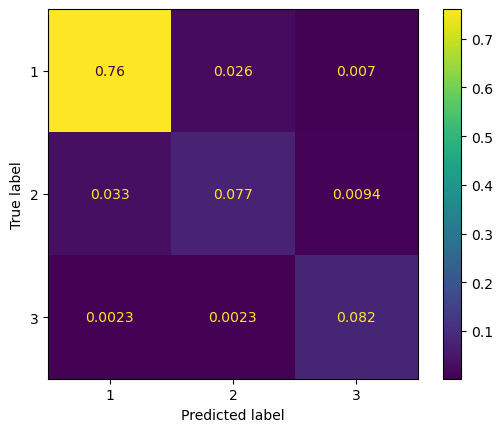

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8,random_state=35)

dt_raw = apply_dt(X_train, X_test, y_train, y_test)

In this case, the accuracy score is not a good metric in evaluating the performance of the model. In fact, with high imbalanced classes, the Accuracy Paradox must be taken into account (cf. https://en.wikipedia.org/wiki/Accuracy_paradox).

### DecisionTree to subsampled data

Decision Tree accuracy: 0.82
Decision Tree recall: 0.82


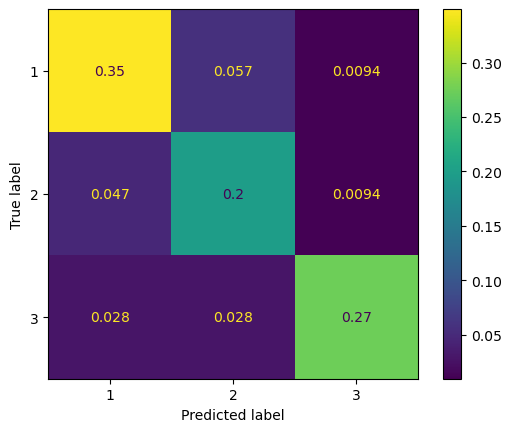

In [60]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub,y1_sub,train_size=0.8,random_state=35)

dt_sub = apply_dt(X_train_sub, X_test_sub, y_train_sub, y_test_sub)

Apply now this method to the raw dataset:

Decision Tree accuracy: 0.92
Decision Tree recall: 0.85


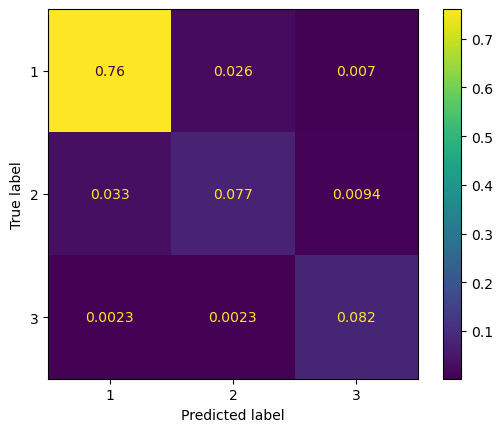

In [61]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_sub);

## Second approach: oversampling the classes

In [63]:
n = 1655

# Oversample the two larger classes
f2_over = f2.sample(n, random_state=34, replace=True)
f3_over = f3.sample(n, random_state=34, replace=True)

# concat the subsamples datasets
f_over = pd.concat([f1,f2_over,f3_over],axis=0,join="outer")
# shuffles the elements
f_over = f_over.sample(frac=1).reset_index(drop=True)

# Define features and target sets
y1_over = f_over["NSP"]
X_over = f_over.drop(labels="NSP",axis=1)

Decision Tree accuracy: 0.98
Decision Tree recall: 0.98


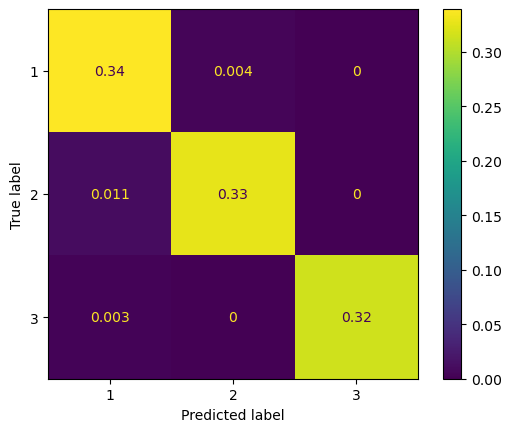

In [65]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y1_over,train_size=0.8,random_state=35)

dt_over = apply_dt(X_train_over, X_test_over, y_train_over, y_test_over)

Decision Tree accuracy: 0.92
Decision Tree recall: 0.85


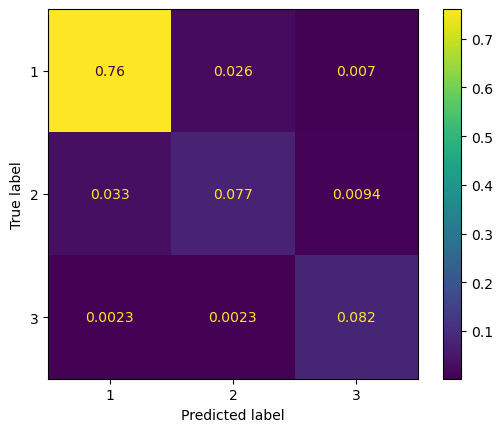

In [66]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_over);

## Unsupervised learning

Objective: apply some methods and evaluate the sensitivity to class with different numerosity

In [68]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import mode

In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.predict(X)

y_kmeans = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    y_kmeans[mask] = mode(y1[mask])[0]

print("K-means accuracy: %.2f" %accuracy_score(y_kmeans, y1))

K-means accuracy: 0.78


In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_over)
clusters = kmeans.predict(X_over)

y_kmeans_over = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    y_kmeans_over[mask] = mode(y1_over[mask])[0]

print("K-means accuracy: %.2f" %accuracy_score(y_kmeans_over, y1_over))

K-means accuracy: 0.47


The accuracy obtained applying a Kmeans method with 3 clusters is very low. This means that the methods is doing  very inaccurate predictions.
As a first workaround, our intention is to apply a Gaussian Mixture Model in order to understand when this problem comes from.

In [73]:
gmm = GaussianMixture(n_components=3,  covariance_type='full', random_state=42)
gmm.fit(X)
clusters = gmm.predict(X)

y_gmm = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    y_gmm[mask] = mode(y1[mask])[0]

print("GMM accuracy: %.2f" %accuracy_score(y_gmm, y1))

GMM accuracy: 0.78


### KMeans to subsampled data

In [74]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_sub)
clusters = kmeans.predict(X_sub)

y_sub_kmeans = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    y_sub_kmeans[mask] = mode(y1_sub[mask])[0]

print("K-means accuracy: %.2f" %accuracy_score(y_sub_kmeans, y1_sub))

K-means accuracy: 0.48


In [75]:
gmm = GaussianMixture(n_components=3,  covariance_type='full', random_state=42)
gmm.fit(X_sub)
clusters = gmm.predict(X_sub)

ysub_gmm = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    ysub_gmm[mask] = mode(y1_sub[mask])[0]

print("GMM accuracy: %.2f" %accuracy_score(ysub_gmm, y1_sub))

GMM accuracy: 0.51
